In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
df = pd.read_csv("Zomato-data-.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


# Data Cleaning and preprocessing 

## converting the rate column to float by removing their demnominator 


In [4]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)
df['rate'] = df['rate'].apply(handleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [6]:
# Checking Null values
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

# Data Visulization 
# Exploratory Data Analysis


Text(0.5, 0, 'Types of resturants')

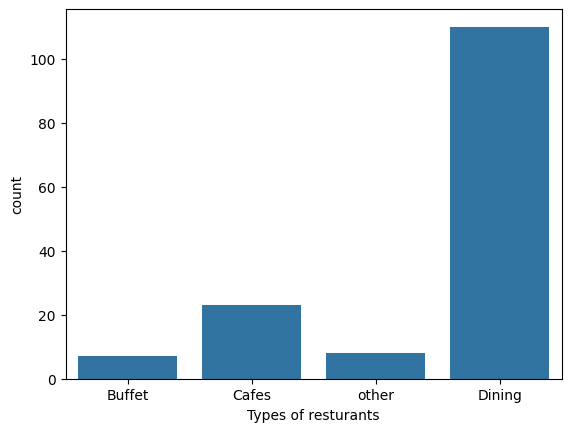

In [7]:
# Exploring the REsturant types
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Types of resturants")

Text(0, 0.5, 'Votes')

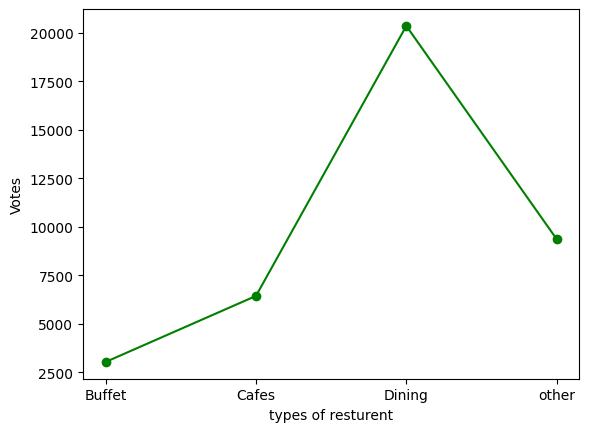

In [11]:
# Count of votes by Each category 
group_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes' : group_data})
plt.plot(result, c='green', marker='o')
plt.xlabel("types of resturent")
plt.ylabel('Votes')

In [16]:
# identify the most voated Resturant 
max_votes = df['votes'].max()
most_voted_resturant = df.loc[df['votes'] == max_votes]['name']
print("Resturants with the maximum voates:")
print(most_voted_resturant)

Resturants with the maximum voates:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

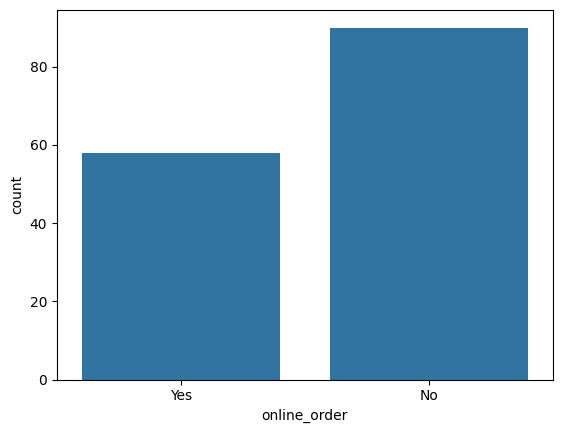

In [17]:
# Online order Avalibility
sns.countplot(x=df['online_order'])

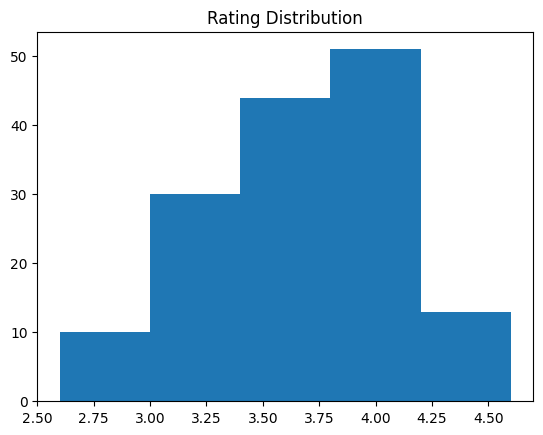

In [18]:
# analyze Rating
plt.hist(df['rate'], bins=5)
plt.title("Rating Distribution")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

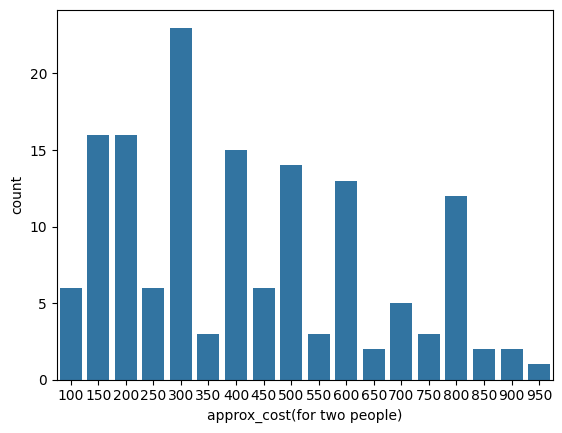

In [19]:
# approximate price for couples
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)

<Axes: xlabel='online_order', ylabel='rate'>

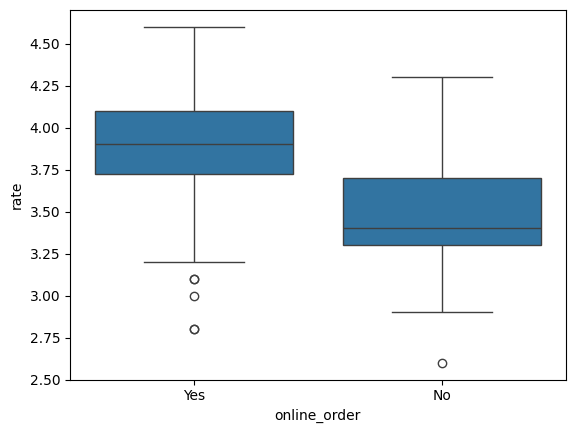

In [22]:
# Rating comparison online vs offline orders
plt.Figure(figsize=(6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

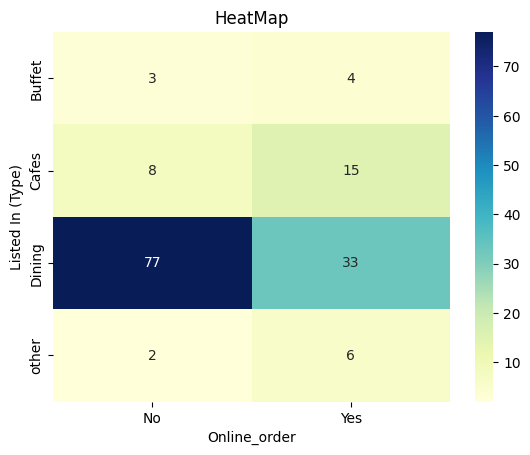

In [24]:
# Order mode prefrence by resturents
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0 )
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title("HeatMap")
plt.xlabel('Online_order')
plt.ylabel('Listed In (Type)')
plt.show()


#ThE EnD